In [1]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = yf.Ticker("AAPL")

In [3]:
data.info
data.calendar
data.analyst_price_targets
data.quarterly_income_stmt
data.history(period='1mo')
data.option_chain(data.options[0]).calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL251128C00110000,2025-11-26 19:51:56+00:00,110.0,168.25,165.95,169.30,2.029999,1.221272,1.0,12,4.718754,True,REGULAR,USD
1,AAPL251128C00120000,2025-11-05 17:41:07+00:00,120.0,150.80,156.45,159.20,0.000000,0.000000,NaN,6,5.011722,True,REGULAR,USD
2,AAPL251128C00125000,2025-11-26 17:55:06+00:00,125.0,153.85,150.90,154.30,8.080002,5.542980,4.0,2,3.937500,True,REGULAR,USD
3,AAPL251128C00130000,2025-11-06 15:22:28+00:00,130.0,141.01,146.45,149.30,0.000000,0.000000,NaN,5,4.675785,True,REGULAR,USD
4,AAPL251128C00135000,2025-11-26 15:29:49+00:00,135.0,142.25,140.90,144.30,-0.889999,-0.621768,2.0,4,3.578126,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,AAPL251128C00365000,2025-10-31 19:20:50+00:00,365.0,0.01,0.00,0.01,0.000000,0.000000,5.0,5,1.156254,False,REGULAR,USD
71,AAPL251128C00370000,2025-11-05 16:24:29+00:00,370.0,0.01,0.00,0.01,0.000000,0.000000,100.0,101,1.218754,False,REGULAR,USD
72,AAPL251128C00375000,2025-11-05 14:34:46+00:00,375.0,0.01,0.00,0.06,0.000000,0.000000,3.0,5,1.468753,False,REGULAR,USD
73,AAPL251128C00395000,2025-11-07 20:25:10+00:00,395.0,0.01,0.00,0.01,0.000000,0.000000,1.0,1,1.437503,False,REGULAR,USD


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch.utils.data import TensorDataset, DataLoader

In [5]:
data_pd = data.history(period="8Y")

In [6]:
data_pd.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-27 00:00:00-05:00,40.995284,41.002309,40.594814,40.770458,82867200,0.0,0.0
2017-11-28 00:00:00-05:00,40.819641,40.953128,40.248212,40.531586,105715200,0.0,0.0
2017-11-29 00:00:00-05:00,40.428552,40.496466,39.147522,39.690845,166665600,0.0,0.0
2017-11-30 00:00:00-05:00,39.913309,40.313779,39.447270,40.245865,166108800,0.0,0.0
2017-12-01 00:00:00-05:00,39.800894,40.203704,39.461316,40.058506,159037200,0.0,0.0


In [7]:
data_pd.reset_index(inplace=True)

In [8]:
data_pd

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-11-27 00:00:00-05:00,40.995284,41.002309,40.594814,40.770458,82867200,0.0,0.0
1,2017-11-28 00:00:00-05:00,40.819641,40.953128,40.248212,40.531586,105715200,0.0,0.0
2,2017-11-29 00:00:00-05:00,40.428552,40.496466,39.147522,39.690845,166665600,0.0,0.0
3,2017-11-30 00:00:00-05:00,39.913309,40.313779,39.447270,40.245865,166108800,0.0,0.0
4,2017-12-01 00:00:00-05:00,39.800894,40.203704,39.461316,40.058506,159037200,0.0,0.0
...,...,...,...,...,...,...,...,...
2007,2025-11-20 00:00:00-05:00,270.829987,275.429993,265.920013,266.250000,45823600,0.0,0.0
2008,2025-11-21 00:00:00-05:00,265.950012,273.329987,265.670013,271.489990,59030800,0.0,0.0
2009,2025-11-24 00:00:00-05:00,270.899994,277.000000,270.899994,275.920013,65585800,0.0,0.0
2010,2025-11-25 00:00:00-05:00,275.269989,280.380005,275.250000,276.970001,46914200,0.0,0.0


In [9]:
type(data_pd['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
data_pd['Date'] = data_pd['Date'].dt.strftime('%Y-%m-%d')

In [11]:
dt = data_pd[['Close']].values

In [12]:
dt

array([[ 40.77045822],
       [ 40.53158569],
       [ 39.69084549],
       ...,
       [275.92001343],
       [276.97000122],
       [277.54998779]], shape=(2012, 1))

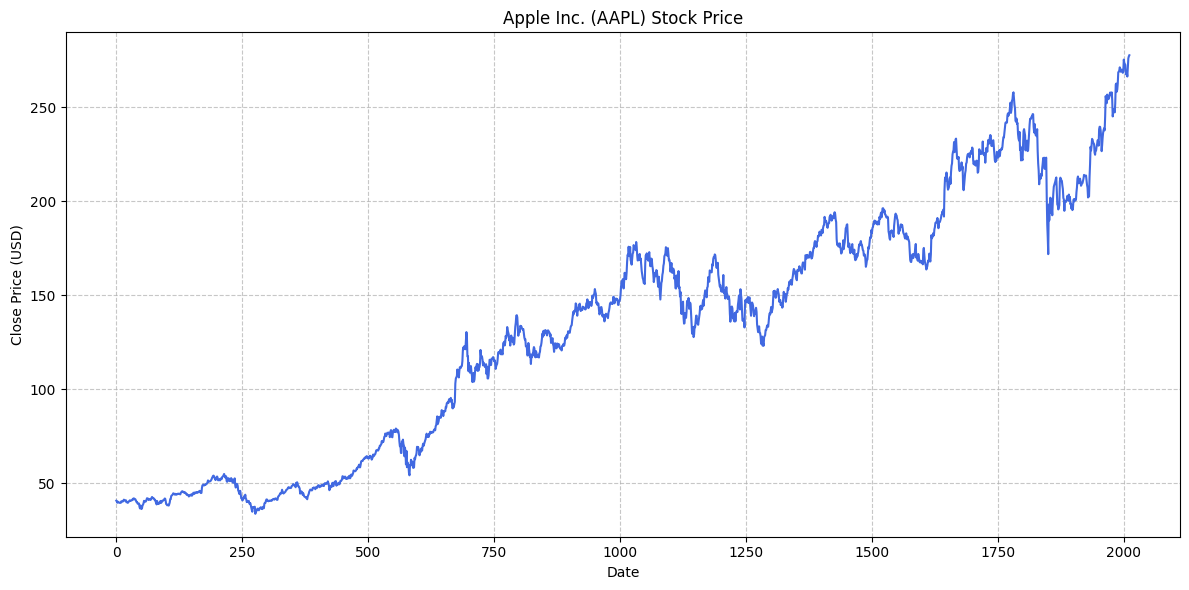

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(dt, color='royalblue', linewidth=1.5)
plt.title('Apple Inc. (AAPL) Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [14]:
from lstm import LSTM
from train import train_model, eval_model

In [15]:
device = torch.device("mps") if torch.backends.mps.is_available() else "cpu"
device

device(type='mps')

In [16]:
scaler = MinMaxScaler(feature_range=(0, 1))
dt = scaler.fit_transform(dt)
dt

array([[0.02859802],
       [0.02761803],
       [0.02416884],
       ...,
       [0.99331293],
       [0.99762057],
       [1.        ]], shape=(2012, 1))

In [17]:
threshold = int(0.95 * len(dt))
train_data = dt[:threshold]
test_data = dt[threshold:]
train_data.shape, test_data.shape

((1911, 1), (101, 1))

In [18]:
window_size = 7
n_train = len(train_data) - window_size
train_data = np.array([train_data[i:i+window_size+1] for i in range(n_train)])
train_data.shape

(1904, 8, 1)

In [19]:
x_train = torch.tensor(train_data[:, :window_size], dtype=torch.float32)
y_train = torch.tensor(train_data[:, window_size], dtype=torch.float32)
x_train.shape, y_train.shape

(torch.Size([1904, 7, 1]), torch.Size([1904, 1]))

In [20]:
n_test = len(test_data) - window_size
test_data = np.array([test_data[i:i+window_size+1] for i in range(n_test)])
test_data.shape

(94, 8, 1)

In [21]:
x_test = torch.tensor(test_data[:, :window_size], dtype=torch.float32)
y_test = torch.tensor(test_data[:, window_size], dtype=torch.float32)
x_test.shape, y_test.shape

(torch.Size([94, 7, 1]), torch.Size([94, 1]))

In [22]:
# Create datasets
train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

# Create loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [23]:
x_train.shape[2], y_train.shape[1]

(1, 1)

In [24]:
model = LSTM(input_size=x_train.shape[-1], hidden_size=32, num_layers=1, output_size=y_train.shape[-1])
model

LSTM(
  (lstm): LSTM(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

In [25]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-4)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)

In [26]:
train_losses = train_model(model, train_loader, criterion, optimizer, num_epochs=60, device=device)

Epoch 1/60: 100%|██████████| 119/119 [00:00<00:00, 131.81batch/s, loss=0.0174] 


Epoch [1/60], Loss: 0.0009


Epoch 2/60: 100%|██████████| 119/119 [00:00<00:00, 154.22batch/s, loss=0.0155]


Epoch [2/60], Loss: 0.0030


Epoch 3/60: 100%|██████████| 119/119 [00:00<00:00, 184.73batch/s, loss=0.00779]


Epoch [3/60], Loss: 0.0020


Epoch 4/60: 100%|██████████| 119/119 [00:00<00:00, 181.39batch/s, loss=0.0057] 


Epoch [4/60], Loss: 0.0009


Epoch 5/60: 100%|██████████| 119/119 [00:00<00:00, 185.63batch/s, loss=0.00953]


Epoch [5/60], Loss: 0.0004


Epoch 6/60: 100%|██████████| 119/119 [00:00<00:00, 187.91batch/s, loss=0.0059] 


Epoch [6/60], Loss: 0.0003


Epoch 7/60: 100%|██████████| 119/119 [00:00<00:00, 189.05batch/s, loss=0.00483]


Epoch [7/60], Loss: 0.0002


Epoch 8/60: 100%|██████████| 119/119 [00:00<00:00, 182.75batch/s, loss=0.00431]


Epoch [8/60], Loss: 0.0002


Epoch 9/60: 100%|██████████| 119/119 [00:00<00:00, 174.63batch/s, loss=0.00403]


Epoch [9/60], Loss: 0.0002


Epoch 10/60: 100%|██████████| 119/119 [00:00<00:00, 188.29batch/s, loss=0.00347]


Epoch [10/60], Loss: 0.0002


Epoch 11/60: 100%|██████████| 119/119 [00:00<00:00, 190.01batch/s, loss=0.00419]


Epoch [11/60], Loss: 0.0002


Epoch 12/60: 100%|██████████| 119/119 [00:00<00:00, 186.33batch/s, loss=0.00769]


Epoch [12/60], Loss: 0.0002


Epoch 13/60: 100%|██████████| 119/119 [00:00<00:00, 182.22batch/s, loss=0.00532]


Epoch [13/60], Loss: 0.0002


Epoch 14/60: 100%|██████████| 119/119 [00:00<00:00, 184.13batch/s, loss=0.00372]


Epoch [14/60], Loss: 0.0002


Epoch 15/60: 100%|██████████| 119/119 [00:00<00:00, 188.68batch/s, loss=0.00347]


Epoch [15/60], Loss: 0.0002


Epoch 16/60: 100%|██████████| 119/119 [00:00<00:00, 190.43batch/s, loss=0.00537]


Epoch [16/60], Loss: 0.0001


Epoch 17/60: 100%|██████████| 119/119 [00:00<00:00, 181.75batch/s, loss=0.00599]


Epoch [17/60], Loss: 0.0001


Epoch 18/60: 100%|██████████| 119/119 [00:00<00:00, 193.76batch/s, loss=0.00527]


Epoch [18/60], Loss: 0.0001


Epoch 19/60: 100%|██████████| 119/119 [00:00<00:00, 192.12batch/s, loss=0.00656]


Epoch [19/60], Loss: 0.0002


Epoch 20/60: 100%|██████████| 119/119 [00:00<00:00, 189.44batch/s, loss=0.00542]


Epoch [20/60], Loss: 0.0001


Epoch 21/60: 100%|██████████| 119/119 [00:00<00:00, 181.69batch/s, loss=0.00466]


Epoch [21/60], Loss: 0.0002


Epoch 22/60: 100%|██████████| 119/119 [00:00<00:00, 192.40batch/s, loss=0.00252]


Epoch [22/60], Loss: 0.0002


Epoch 23/60: 100%|██████████| 119/119 [00:00<00:00, 192.34batch/s, loss=0.00568]


Epoch [23/60], Loss: 0.0002


Epoch 24/60: 100%|██████████| 119/119 [00:00<00:00, 191.44batch/s, loss=0.00787]


Epoch [24/60], Loss: 0.0002


Epoch 25/60: 100%|██████████| 119/119 [00:00<00:00, 180.96batch/s, loss=0.00395]


Epoch [25/60], Loss: 0.0002


Epoch 26/60: 100%|██████████| 119/119 [00:01<00:00, 81.33batch/s, loss=0.00328] 


Epoch [26/60], Loss: 0.0001


Epoch 27/60: 100%|██████████| 119/119 [00:01<00:00, 79.56batch/s, loss=0.00503] 


Epoch [27/60], Loss: 0.0001


Epoch 28/60: 100%|██████████| 119/119 [00:00<00:00, 158.35batch/s, loss=0.00355]


Epoch [28/60], Loss: 0.0001


Epoch 29/60: 100%|██████████| 119/119 [00:00<00:00, 151.08batch/s, loss=0.00266]


Epoch [29/60], Loss: 0.0001


Epoch 30/60: 100%|██████████| 119/119 [00:00<00:00, 184.02batch/s, loss=0.00609]


Epoch [30/60], Loss: 0.0001


Epoch 31/60: 100%|██████████| 119/119 [00:00<00:00, 184.02batch/s, loss=0.00203]


Epoch [31/60], Loss: 0.0001


Epoch 32/60: 100%|██████████| 119/119 [00:00<00:00, 189.86batch/s, loss=0.00336]


Epoch [32/60], Loss: 0.0001


Epoch 33/60: 100%|██████████| 119/119 [00:00<00:00, 188.45batch/s, loss=0.00404]


Epoch [33/60], Loss: 0.0001


Epoch 34/60: 100%|██████████| 119/119 [00:00<00:00, 182.73batch/s, loss=0.0031] 


Epoch [34/60], Loss: 0.0001


Epoch 35/60: 100%|██████████| 119/119 [00:00<00:00, 190.75batch/s, loss=0.00385]


Epoch [35/60], Loss: 0.0001


Epoch 36/60: 100%|██████████| 119/119 [00:00<00:00, 187.11batch/s, loss=0.00203]


Epoch [36/60], Loss: 0.0001


Epoch 37/60: 100%|██████████| 119/119 [00:00<00:00, 170.75batch/s, loss=0.0025] 


Epoch [37/60], Loss: 0.0001


Epoch 38/60: 100%|██████████| 119/119 [00:01<00:00, 112.63batch/s, loss=0.00308]


Epoch [38/60], Loss: 0.0001


Epoch 39/60: 100%|██████████| 119/119 [00:00<00:00, 182.57batch/s, loss=0.00231]


Epoch [39/60], Loss: 0.0001


Epoch 40/60: 100%|██████████| 119/119 [00:00<00:00, 187.83batch/s, loss=0.00264]


Epoch [40/60], Loss: 0.0001


Epoch 41/60: 100%|██████████| 119/119 [00:00<00:00, 185.61batch/s, loss=0.00276]


Epoch [41/60], Loss: 0.0001


Epoch 42/60: 100%|██████████| 119/119 [00:00<00:00, 183.05batch/s, loss=0.00329]


Epoch [42/60], Loss: 0.0001


Epoch 43/60: 100%|██████████| 119/119 [00:00<00:00, 194.32batch/s, loss=0.00455]


Epoch [43/60], Loss: 0.0001


Epoch 44/60: 100%|██████████| 119/119 [00:00<00:00, 187.77batch/s, loss=0.00174]


Epoch [44/60], Loss: 0.0001


Epoch 45/60: 100%|██████████| 119/119 [00:00<00:00, 171.41batch/s, loss=0.0041] 


Epoch [45/60], Loss: 0.0001


Epoch 46/60: 100%|██████████| 119/119 [00:00<00:00, 188.93batch/s, loss=0.004]  


Epoch [46/60], Loss: 0.0001


Epoch 47/60: 100%|██████████| 119/119 [00:00<00:00, 190.44batch/s, loss=0.00558]


Epoch [47/60], Loss: 0.0001


Epoch 48/60: 100%|██████████| 119/119 [00:00<00:00, 192.39batch/s, loss=0.00236]


Epoch [48/60], Loss: 0.0001


Epoch 49/60: 100%|██████████| 119/119 [00:00<00:00, 189.78batch/s, loss=0.00292]


Epoch [49/60], Loss: 0.0001


Epoch 50/60: 100%|██████████| 119/119 [00:00<00:00, 192.55batch/s, loss=0.00334]


Epoch [50/60], Loss: 0.0001


Epoch 51/60: 100%|██████████| 119/119 [00:00<00:00, 186.00batch/s, loss=0.00193] 


Epoch [51/60], Loss: 0.0001


Epoch 52/60: 100%|██████████| 119/119 [00:00<00:00, 194.18batch/s, loss=0.00235]


Epoch [52/60], Loss: 0.0001


Epoch 53/60: 100%|██████████| 119/119 [00:00<00:00, 191.63batch/s, loss=0.00297]


Epoch [53/60], Loss: 0.0001


Epoch 54/60: 100%|██████████| 119/119 [00:00<00:00, 187.85batch/s, loss=0.000758]


Epoch [54/60], Loss: 0.0001


Epoch 55/60: 100%|██████████| 119/119 [00:00<00:00, 184.11batch/s, loss=0.0028] 


Epoch [55/60], Loss: 0.0001


Epoch 56/60: 100%|██████████| 119/119 [00:00<00:00, 185.64batch/s, loss=0.0014]  


Epoch [56/60], Loss: 0.0001


Epoch 57/60: 100%|██████████| 119/119 [00:00<00:00, 190.87batch/s, loss=0.00201] 


Epoch [57/60], Loss: 0.0001


Epoch 58/60: 100%|██████████| 119/119 [00:00<00:00, 187.45batch/s, loss=0.0022] 


Epoch [58/60], Loss: 0.0001


Epoch 59/60: 100%|██████████| 119/119 [00:00<00:00, 187.23batch/s, loss=0.00411]


Epoch [59/60], Loss: 0.0001


Epoch 60/60: 100%|██████████| 119/119 [00:00<00:00, 191.54batch/s, loss=0.00202]

Epoch [60/60], Loss: 0.0001


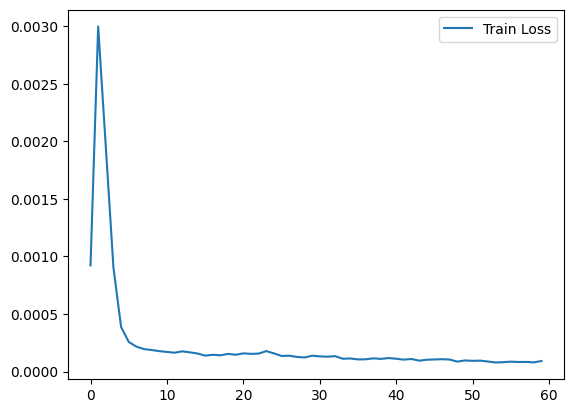

In [27]:
plt.plot(train_losses, label='Train Loss')
# plt.plot(val_losses, label='Validation Loss')
plt.legend()

In [28]:
predicts, actuals = eval_model(model, train_loader, criterion, device=device, scaler=scaler)

Evaluating: 100%|██████████| 119/119 [00:00<00:00, 509.61batch/s]

RMSE: 8.3488


In [29]:
predicts, actuals

(array([[ 51.01875 ],
        [ 50.885326],
        [ 50.807423],
        ...,
        [201.7394  ],
        [203.84325 ],
        [205.71782 ]], shape=(1904, 1), dtype=float32),
 array([[ 39.580765],
        [ 39.653374],
        [ 39.665066],
        ...,
        [211.99367 ],
        [213.10135 ],
        [209.5089  ]], shape=(1904, 1), dtype=float32))

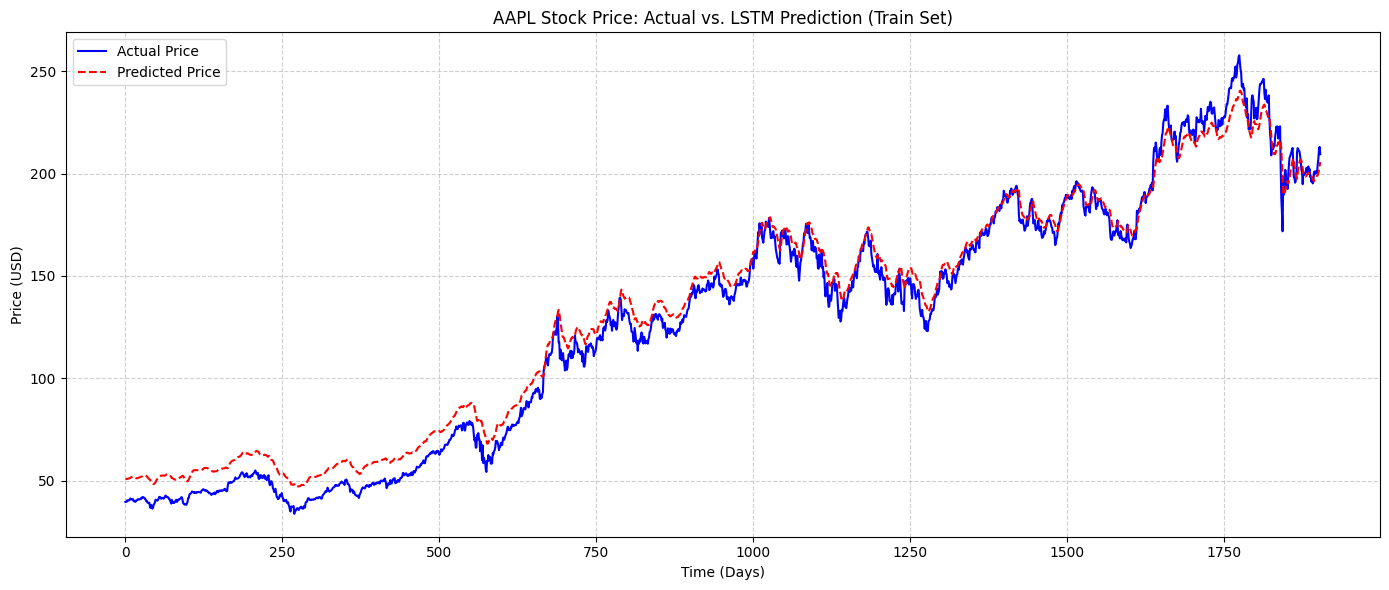

In [30]:
plt.figure(figsize=(14, 6))
plt.plot(actuals, label='Actual Price', color='blue')
plt.plot(predicts, label='Predicted Price', color='red', linestyle='--')
plt.title(f'AAPL Stock Price: Actual vs. LSTM Prediction (Train Set)')
plt.xlabel('Time (Days)')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [31]:
test_pred, test_act = eval_model(model, test_loader, criterion, device=device, scaler=scaler)

Evaluating: 100%|██████████| 6/6 [00:00<00:00, 238.31batch/s]

RMSE: 15.0796


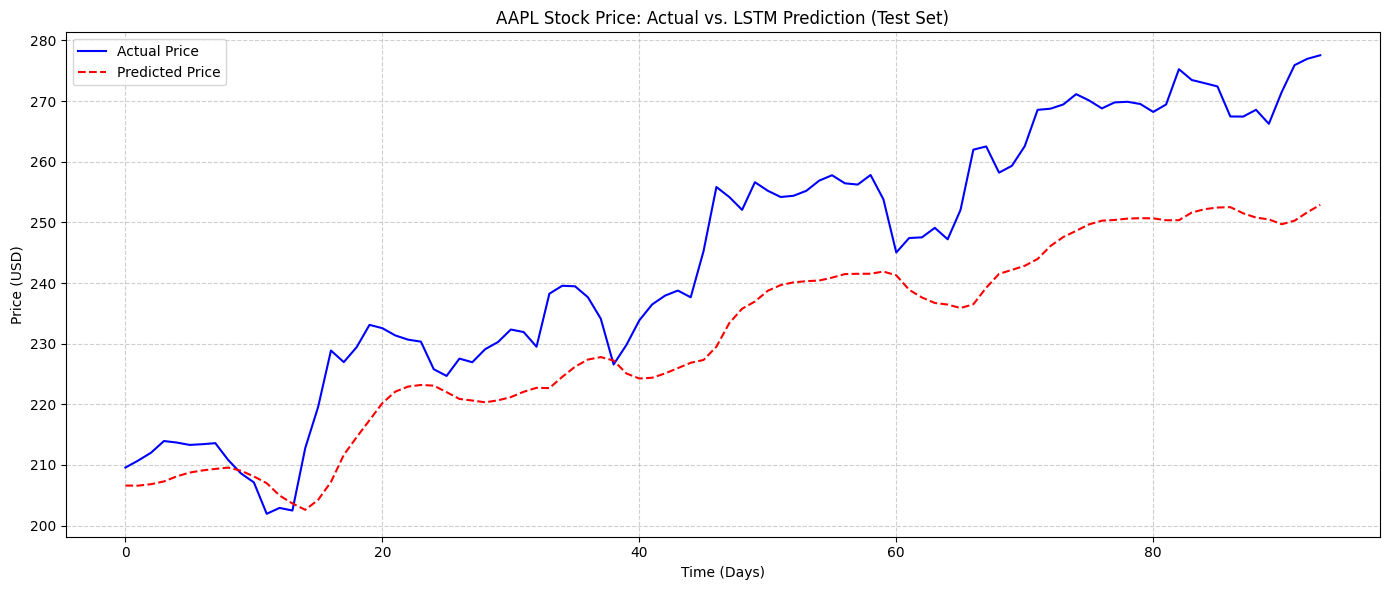

In [32]:
plt.figure(figsize=(14, 6))
plt.plot(test_act, label='Actual Price', color='blue')
plt.plot(test_pred, label='Predicted Price', color='red', linestyle='--')
plt.title(f'AAPL Stock Price: Actual vs. LSTM Prediction (Test Set)')
plt.xlabel('Time (Days)')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()